<a href="https://colab.research.google.com/github/soheldatta17/Knee-Arthritis-Detection/blob/main/knee_arthritis_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.moati.com.au/wp-content/uploads/2022/05/knee-arthritis-surgery.jpg)

# Initial Imports

In [ ]:
import tensorflow
import numpy as np
import keras
import cv2,os

# Data Preprocessing

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hafiznouman786/annotated-dataset-for-knee-arthritis-detection -p /content/ --unzip

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/annotated-dataset-for-knee-arthritis-detection
License(s): CC0-1.0
 98% 57.0M/58.3M [00:04<00:00, 22.3MB/s]
100% 58.3M/58.3M [00:04<00:00, 13.6MB/s]


In [ ]:
import os
os.listdir("/content/Training")

['1Doubtful', '3Moderate', '4Severe', '0Normal', '2Mild']

In [ ]:
data_path='/content/Training'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'1Doubtful': 0, '3Moderate': 1, '4Severe': 2, '0Normal': 3, '2Mild': 4}
['1Doubtful', '3Moderate', '4Severe', '0Normal', '2Mild']
[0, 1, 2, 3, 4]


In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Rescale and assign  catagorical labels

In [ ]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

from keras.utils import to_categorical
new_label= to_categorical(label)

In [ ]:
new_label.shape

(1650, 5)

In [ ]:
data.shape

(1650, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

# Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 254, 254, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,788,645 (14.45 MB)

 Trainable params: 3,788,645 (14.45 MB)

 Non-trainable params: 0 (0.00 B)

# Splitting data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

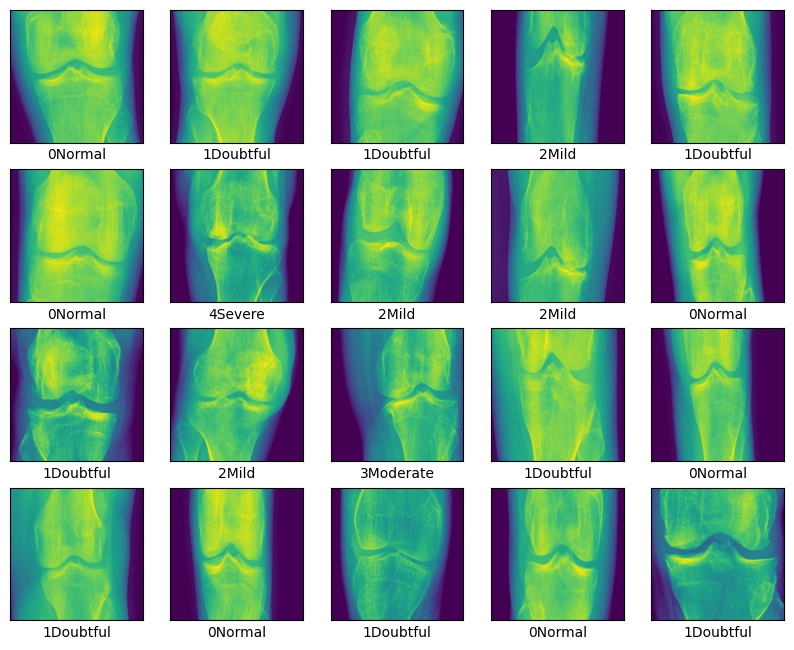

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

# Model Training

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 374ms/step - accuracy: 0.2981 - loss: 1.5656 - val_accuracy: 0.3838 - val_loss: 1.4849
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.3093 - loss: 1.5226 - val_accuracy: 0.3704 - val_loss: 1.4433
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3473 - loss: 1.4850 - val_accuracy: 0.3906 - val_loss: 1.4239
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.3673 - loss: 1.4273 - val_accuracy: 0.4007 - val_loss: 1.4036
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3806 - loss: 1.4430 - val_accuracy: 0.3569 - val_loss: 1.3964
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.3358 - loss: 1.4395 - val_accuracy: 0.4411 - val_loss: 1.3590
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3778 - loss: 1.3858 - val_accuracy: 0.3636 - val_loss: 1.4317
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3996 - loss: 1.3829 - val_acc

# Export The Model

In [ ]:
import os

# Create a directory to store all model formats
os.makedirs("saved_model", exist_ok=True)

# Save in HDF5 format (Legacy)
model.save("saved_model/model.h5")

# Save in Keras format (Recommended)
model.save("saved_model/model.keras")

# Save only weights
model.save_weights("saved_model/model.weights.h5")


# Plot The Training Loss And Accuracy

In [ ]:
from matplotlib import pyplot as plt

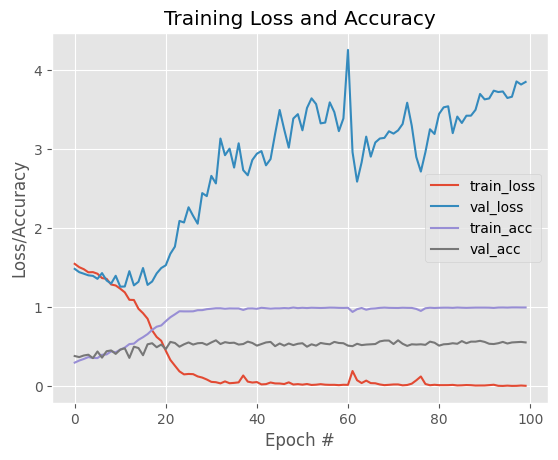

In [ ]:
N = 100 #number of epochs

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

# Accuracy

In [ ]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 4.032295227050781 %
test accuracy: 0.521212100982666 %


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
A.I predicts: 1Doubtful
Correct prediction for label 0 is 1Doubtful


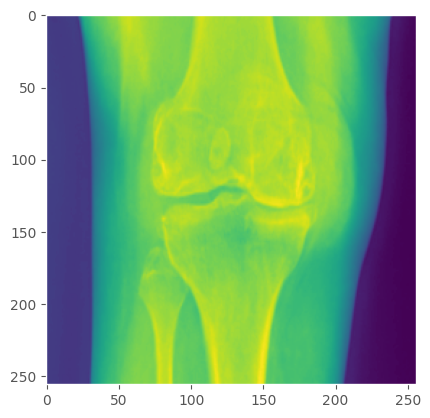

In [ ]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

# Confusion Matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


<Figure size 640x480 with 0 Axes>

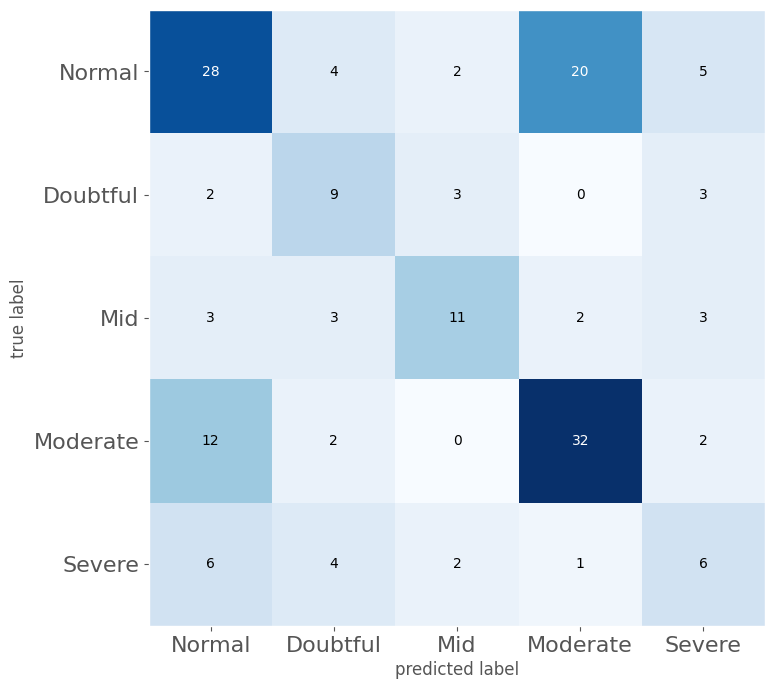

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()